In [27]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, RocCurveDisplay 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

1. What is the entropy of the target variable, “poisonous”?
2. What is the first attribute a decision tree trained using the entropy and the information gain method (the decision tree uses the most informative attribute as the first one to check. So which attribute was the most informative?)
3. What is the information gain of this attribute?
4. Draw the full decision tree learned from this data set .

1. The entropy of the target variable is -1((7/12)*log2(7/12) + (5/12)*log2(5/12)) = 0.9798687566511528
2. The most informative attribute is spots 
3. The information gain of the spots attribute is 0.991 
4. 

testing accuracy: 1.0


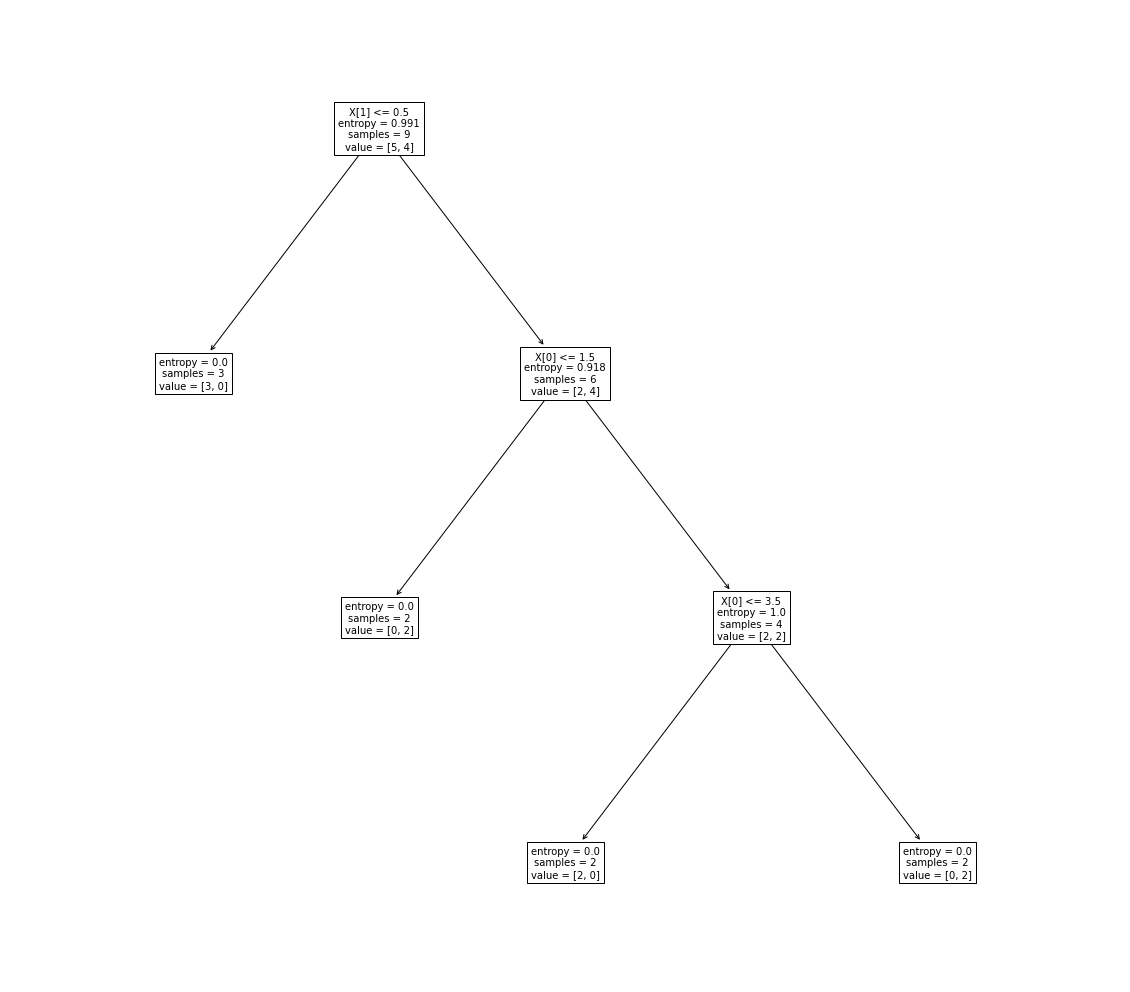

In [28]:
df = pd.read_csv('poison.txt', header = 'infer')
# 0 = N + White , 1 = Y + Brown
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['poisonous'], test_size= 0.20, random_state= 777, shuffle = True, stratify= df['poisonous'])
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f'testing accuracy: {test_acc}')

(fig,ax) = plt.subplots(figsize= (20,18))
plot_tree(classifier, fontsize= 10, ax = ax)
plt.show()

Part 2: Decision Tree using Python
Download the Breast cancer dataset from
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
1) Divide the data into train (80%) and test (20%)
2) Using the Scikit-Learn Library train the Decision Tree Classifier using all the features of the data and test your model on the test data
3) Use the Grid Search method to run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures.
4) Determine the best model use the plot.tree() method to visualize it.
5) Use Adaboost to improve the model and evaluate the performance using the test set.
6) What is the accuracy?

In [29]:
colnames = ['id','diagnosis',
            'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
            'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
            'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']
df = pd.read_csv('wdbc.data', header = None, names = colnames)

# replacing diagnosis val with numerical val

for idx,row in df.iterrows():
    if row['diagnosis'] == 'M':
        df.loc[idx,'diagnosis'] = 0
    else:
        df.loc[idx,'diagnosis'] = 1
df['diagnosis'] = df['diagnosis'].values.astype(int)
df.tail()


#1
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:], df['diagnosis'], test_size= 0.20, random_state= 777, shuffle = True, stratify= df['diagnosis'])

#2
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f'testing accuracy: {test_acc}')

#3 parameters are max_depth + criterion
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1,2,3,4,5,6]}
tree_grid = GridSearchCV(classifier, parameters)
tree_grid = tree_grid.fit(X_train, y_train)
print(f'best estimator: {tree_grid.best_estimator_}, best parameter: {tree_grid.best_params_}, best score: {tree_grid.best_score_}')

testing accuracy: 0.9473684210526315
best estimator: DecisionTreeClassifier(max_depth=4), best parameter: {'criterion': 'gini', 'max_depth': 4}, best score: 0.9362637362637363


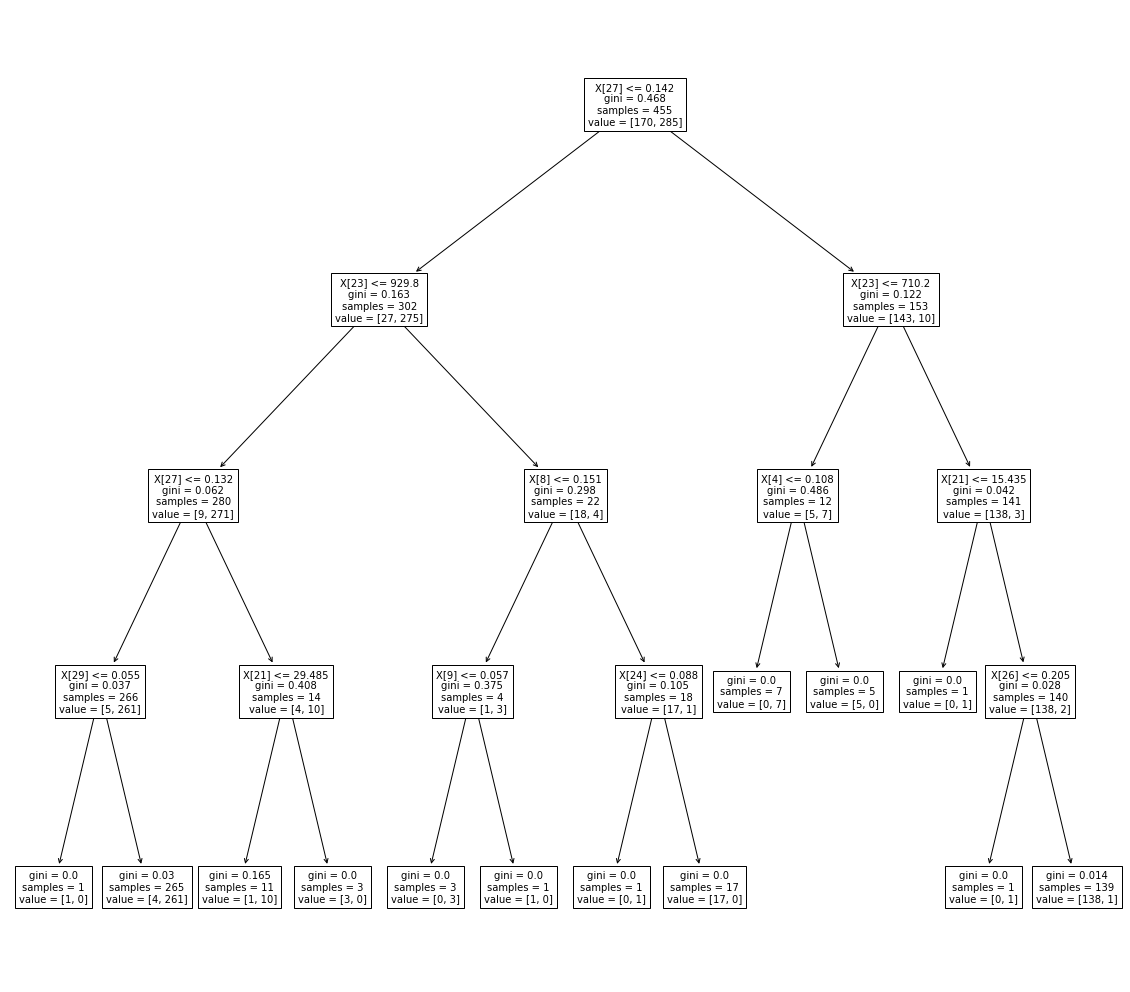

testing accuracy for GridSearch best estimator : 0.956140350877193


In [30]:
#4
(fig,ax) = plt.subplots(figsize= (20,18))
plot_tree(tree_grid.best_estimator_, fontsize= 10, ax = ax)
plt.show()
y_pred = tree_grid.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f'testing accuracy for GridSearch best estimator : {test_acc}')

In [34]:
#5
clf = AdaBoostClassifier(n_estimators=100, random_state=777, learning_rate= 0.1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
prec = precision_score(y_pred=y_pred, y_true=y_test)
print(f'testing accuracy for AdaBoost: {test_acc},precision for AdaBoost:{prec}, recall for AdaBoost: {recall_score(y_pred=y_pred, y_true=y_test)}')

testing accuracy for AdaBoost: 0.9736842105263158,precision for AdaBoost:0.96, recall for AdaBoost: 1.0


Part 3: Random Forest using Python
Using the same dataset as above
1) Use the same training and test set as above.
2) Use the RandomForest classifier (https://scikit-learn.org/stable/modules/generated/
sklearn.ensemble.RandomForestClassifier.html) to create a model.
3) Compare the parameters that are provided for the Random Forest classifier and Decision
Tree classifier. How many are the same and how many are different?
4) Use the Grid Search method to run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the
Gini Impurity and Entropy impurity measures. Also set the parameter so it will use the "outof-bag" samples for calculating accuracy.
5) Test the accuracy of RandomForest using the Test set.
6) Compare the performance of Decision Tree with Boost and Random Forest

In [35]:
#2
classifier = RandomForestClassifier(oob_score= True)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
# testing accuracy of RFC WITHOUT gridsearch
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f'testing accuracy: {test_acc}')

#3
 
#4 
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1,2,3,4,5,6]}
forest_grid = GridSearchCV(classifier, parameters)
forest_grid = forest_grid.fit(X_train, y_train)
print(f'best estimator: {forest_grid.best_estimator_}, best parameter: {forest_grid.best_params_}')

#5
y_pred = forest_grid.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(f'testing accuracy for best Random Forest : {test_acc}, precision for best Random Forest : {precision_score(y_pred=y_pred, y_true=y_test)}, recall for best Random Forest : {recall_score(y_pred=y_pred, y_true=y_test)}')

testing accuracy: 0.9736842105263158
best estimator: RandomForestClassifier(criterion='entropy', max_depth=4, oob_score=True), best parameter: {'criterion': 'entropy', 'max_depth': 4}
testing accuracy for best Random Forest : 0.9736842105263158, precision for best Random Forest : 0.96, recall for best Random Forest : 1.0,
